<a href="https://colab.research.google.com/github/SpenBobCat/Project-1-Sales-Predictions/blob/main/Data_Science_Project_1_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Sales Predictions**

# Michael Spencer

## Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Use Pandas to read the sales prediction data set into Google Colab.
# Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


filename = ('/content/Assignment_sales_predictions_Core_Part_2.xlsx')
df = pd.read_excel(filename)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [5]:
# How many rows and columns?

df.shape

(8523, 12)

In [6]:
# What are the datatypes of each variable?
# To see the data types of each variable in the DataFrame, you can use the 'dtypes' attribute of the DataFrame. 
# This will return a Series object with the data types of each column.

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Are there duplicates? If so, drop any duplicates.
# To check for duplicates in a DataFrame, you can use the duplicated() method of the DataFrame. 
# This method will return a boolean mask indicating which rows are duplicates.

duplicates = df.duplicated()
duplicates



0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
# Print the number of duplicates
# This will print the number of duplicates in the DataFrame. If there are no duplicates, it will print Number of duplicates: 0.

print(f'Number of duplicates: {duplicates.sum()}')

Number of duplicates: 0


In [9]:
# To drop duplicates from the DataFrame, you can use the drop_duplicates() method. 
# This method will remove all rows that are duplicates and return a new DataFrame with the duplicates removed.
# Drop duplicates

df = df.drop_duplicates()


In [10]:
# Identify missing values.
# To identify missing values in a Pandas DataFrame, you can use the isnull() method 
# and the sum() method to count the number of missing values in each column.

# Count the number of missing values in each column
missing = df.isnull().sum()

# Print the number of missing values in each column
print(missing)


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
# Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
# To replace missing values with a specific string, such as "Missing", you can use the fillna() method of the 
# DataFrame and pass the desired string as the replacement value. 
# Replace missing values with the string "Missing"


df = df.fillna("Missing")


In [12]:
# Confirm that there are no missing values after addressing them.
# To confirm that there are no missing values after addressing them, 
# you can use the isnull().sum() method of the DataFrame and check that the output is all zeros

# Check for missing values
missing = df.isnull().sum()

# Print the number of missing values in each column
print(missing)


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [13]:
item_types = df["Item_Type"].unique()
print(item_types)

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [14]:
non_null_counts = df.count()
print(non_null_counts)

Item_Identifier              8523
Item_Weight                  8523
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  8523
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64


In [15]:
missing_values = df["Item_Weight"].isnull().sum()
print(f"There are {missing_values} missing values in the 'Item_Weight' column.")

There are 0 missing values in the 'Item_Weight' column.


In [16]:
df['Item_Weight'].value_counts()

Missing    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64

In [17]:
df["Item_Weight"] = pd.to_numeric(df["Item_Weight"], errors="coerce")

In [18]:
from sklearn.impute import SimpleImputer

df["Item_Weight"] = df["Item_Weight"].interpolate()


This will fill in the missing values in the "Item_Weight" column with interpolated values based on the known data points in the column.

In [19]:
df['Item_Weight'].value_counts()

12.15000    88
17.60000    84
13.65000    78
11.80000    76
15.10000    71
            ..
12.77250     1
14.06125     1
10.99750     1
6.24750      1
13.87250     1
Name: Item_Weight, Length: 1443, dtype: int64

In [20]:
#  Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
# Replace the category '' with ''

df['Item_Fat_Content'].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)


In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)
# Get the summary statistics for the numerical columns
# To obtain the summary statistics (minimum, maximum, and mean) of each numerical 
# column in a Pandas DataFrame, you can use the describe() method of the DataFrame. 
# This method will compute several summary statistics for each numerical column, including the minimum, maximum, and mean.

stats = df.describe()


# Print the summary statistics
print(stats)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.831222         0.066132   140.992782                1997.831867   
std       4.445074         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.000000         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.600000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


## Exploratory Visuals

https://www.kaggle.com/code/shaileshgoku/big-mart-sales?scriptVersionId=111372436&cellId=6

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
## Using three seaborn styles: dark_background, seaborn-muted and seaborn-poster.
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

**countplot:** This method, available through the seaborn library, allows you to create a bar plot that displays the count of each unique value in a categorical column. For example, you can use the following code to create a countplot of the "Item_Type" column:

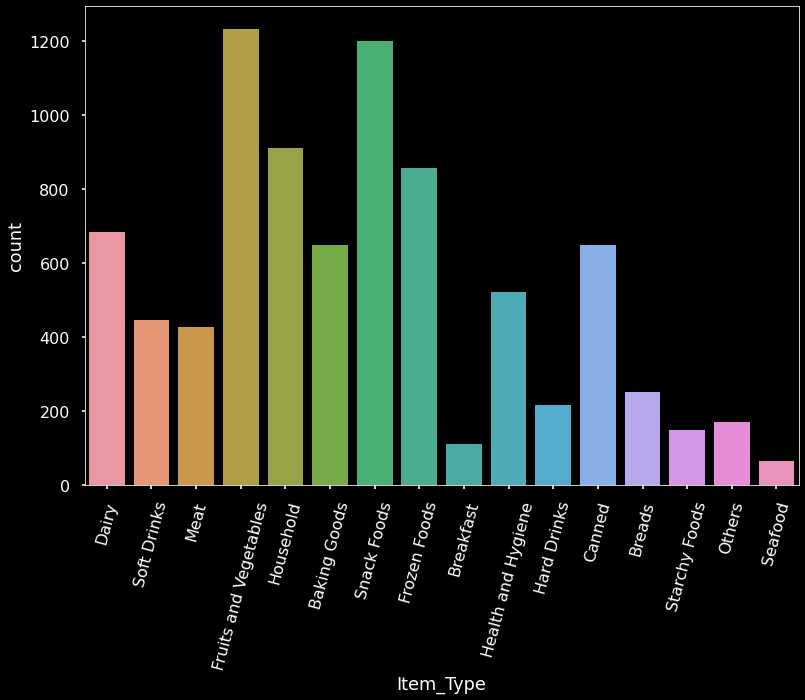

In [27]:
ax = sns.countplot(x="Item_Type", data=df)
plt.xticks(rotation=75);

**histplot:** This method allows you to create a histogram that displays the distribution of a numerical column. For example, you can create a histogram of the "Item_Weight" column:

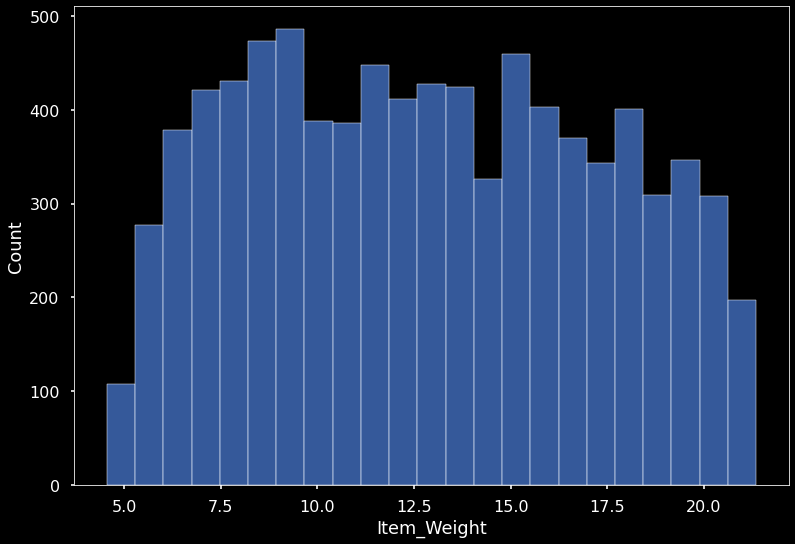

In [28]:
import seaborn as sns

sns.histplot(x="Item_Weight", data=df);

**boxplot:** This method, available through both the seaborn and matplotlib libraries, allows you to create a box plot that displays the distribution of a numerical column. For example, to create a box plot of the "Item_MRP" column:

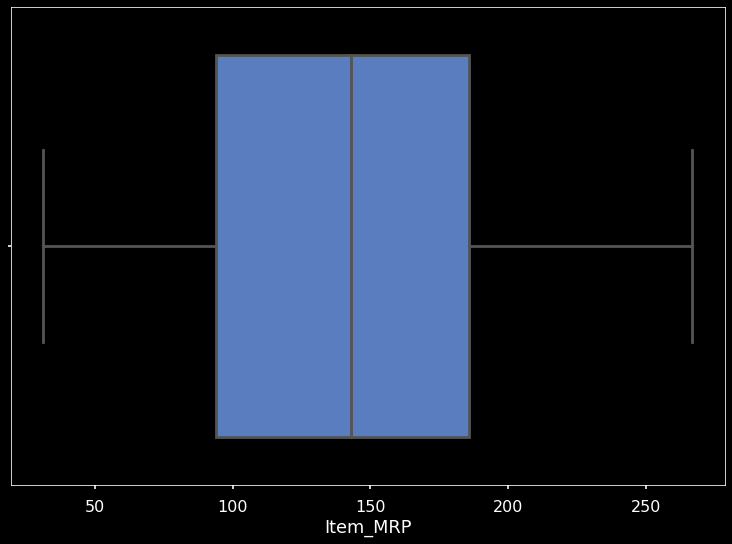

In [29]:
import seaborn as sns

sns.boxplot(x="Item_MRP", data=df);

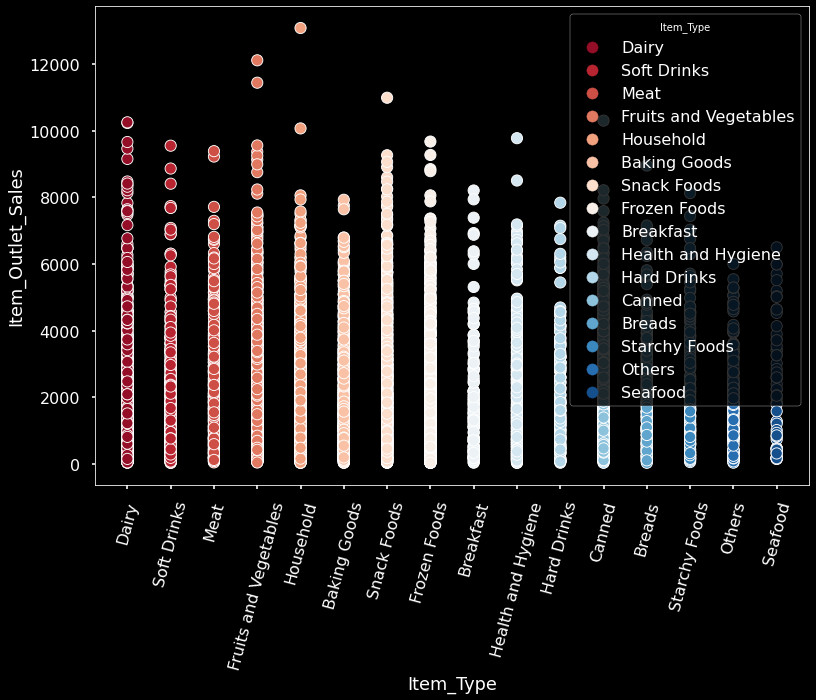

In [30]:
import seaborn as sns

palette = sns.color_palette("RdBu", n_colors=len(df["Item_Type"].unique()))
sns.scatterplot(x="Item_Type", y="Item_Outlet_Sales", data=df, hue="Item_Type", palette=palette)
plt.xticks(rotation=75);

In [31]:
import matplotlib.pyplot as plt

def eda_plot(df,Item_Outlet_Sales):
    plt.figure(figsize=(15, 10))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    plt.hist(df["Item_Outlet_Sales"])
    plt.xlabel("Item_Outlet_Sales")
    plt.ylabel("Frequency")
    
    # Plot boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df["Item_Outlet_Sales"])
    plt.xlabel("Item_Outlet_Sales")

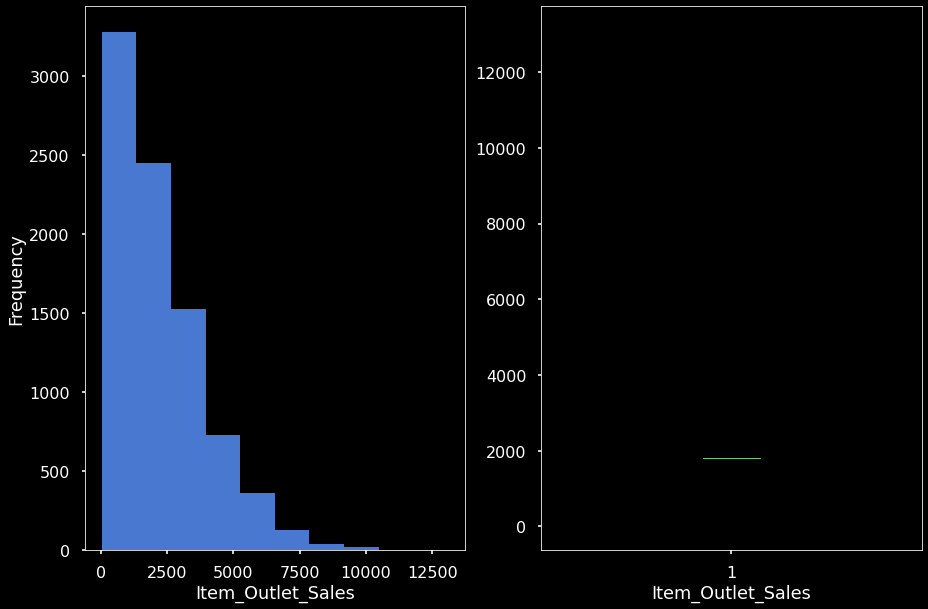

In [32]:
eda_plot(df, "Item_Outlet_Sales")

## Explanatory Visuals